# Deaths by State, Year, and Cause

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Reading CSV file

Read csv file with pandas and made into a DataFrame.

In [3]:
csv_file = pd.read_csv("Weekly_Counts_of_Death_by_Jurisdiction_and_Select_Causes_of_Death_new_file.csv", low_memory=False)

deaths_cause_df = pd.DataFrame(csv_file)
deaths_cause_df.head(5)

,Jurisdiction,Week Ending Date,State Abbreviation,Year,Week,Cause Group,Number of Deaths,Cause Subgroup,Time Period,Suppress,Note,Average Number of Deaths in Time Period,Difference from 2015-2019 to 2020,Percent Difference from 2015-2019 to 2020,Type
0,Alabama,1/10/2015,AL,2015,1,Alzheimer disease and dementia,120.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)
1,Alabama,1/10/2015,AL,2015,1,Alzheimer disease and dementia,120.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Unweighted
2,Alabama,1/9/2016,AL,2016,1,Alzheimer disease and dementia,76.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)
3,Alabama,1/9/2016,AL,2016,1,Alzheimer disease and dementia,76.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Unweighted
4,Alabama,1/7/2017,AL,2017,1,Alzheimer disease and dementia,96.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)


Because I won't be using these columns or they don't have enough data I will be dropping them. 

In [4]:
deaths_cause_df.drop(deaths_cause_df.columns[[1, 8, 9, 10, 11, 12, 13 ]], inplace=True, axis=1)

In [5]:
description = [
["Jurisdiction","Jurisdiction of occurrence"],
["Week Ending Date","Week ending date"],
["State Abbreviation","State abbreviation"],
["Year","Year"],
["Week","Week number"],
["Cause Group","Cause group"],
["Number of Deaths", "Number of deaths"],
["Cause Subgroup", "Cause Subgroup"],
["Time Period","Time period"],
["Suppress","Flag for data suppression"],
["Note","Note about data"],
["Average Number of Deaths in Time Period","Average number of deaths in a given time period and week number"],
["Difference from 2015-2019 to 2020","Difference in the number of deaths in 2020 relative to 2015-2019"],
["Percent Difference from 2015-2019 to 2020","Percent difference in the number of deaths in 2020 relative to 2015-2019"],
["Type", "Estimate type (predicted or observed)"]]

column_desc = pd.DataFrame(description,columns=["column_name","description"])

# changeing index to column name
column_desc.set_index("column_name", inplace=True)

def find_desc(desc_name):
    for word in column_desc.index:
        if desc_name.lower() in word.lower():
            return column_desc.loc[word]

        
# finding the description of our columns with either uppercase or lowercase words.
find_desc("type")

deaths_cause_df[deaths_cause_df["Year"] == 2021]["Week"].max()


52

This section I removed duplicates by getting the unweighted number type because this is not predicted data this is the actual number of deaths. Then I did not include Puerto Rico because it is a U.S. territory. I also did not include the total number of deaths in the U.S. because I wanted to analyze data by state. I also excluded the year 2022 because we dont have number of deaths for the whole year.

In [6]:
# using unweighted deaths because they are the real deaths not predicted and that would be duplicate years.
death_cause_unweighted = deaths_cause_df[(deaths_cause_df["Type"] == "Unweighted") & (deaths_cause_df["Jurisdiction"] != "Puerto Rico") & (deaths_cause_df["Jurisdiction"] != "United States") & (deaths_cause_df["Year"]!= 2022)]

# making dataset into a csv so I can look at in in tableau.
death_cause_unweighted.to_csv("deaths_and_cause_dataset.csv", index=False)

# Total deaths in the unweighted dataset
total_deaths = death_cause_unweighted["Number of Deaths"].sum()

len_years = len(death_cause_unweighted["Year"].unique())

# average number of deaths in our dataset
avg_deaths = f"{total_deaths/len_years:,}"
avg_deaths

deaths_each_year = death_cause_unweighted[["Year", "Number of Deaths"]].groupby("Year").sum()

death_cause_unweighted



,Jurisdiction,State Abbreviation,Year,Week,Cause Group,Number of Deaths,Cause Subgroup,Type
1,Alabama,AL,2015,1,Alzheimer disease and dementia,120.0,Alzheimer disease and dementia,Unweighted
3,Alabama,AL,2016,1,Alzheimer disease and dementia,76.0,Alzheimer disease and dementia,Unweighted
5,Alabama,AL,2017,1,Alzheimer disease and dementia,96.0,Alzheimer disease and dementia,Unweighted
7,Alabama,AL,2018,1,Alzheimer disease and dementia,108.0,Alzheimer disease and dementia,Unweighted
9,Alabama,AL,2019,1,Alzheimer disease and dementia,115.0,Alzheimer disease and dementia,Unweighted
...,...,...,...,...,...,...,...,...
432309,Wisconsin,WI,2016,52,Respiratory diseases,30.0,Other diseases of the respiratory system,Unweighted
432311,Wisconsin,WI,2017,52,Respiratory diseases,20.0,Other diseases of the respiratory system,Unweighted
432313,Wisconsin,WI,2018,52,Respiratory diseases,27.0,Other diseases of the respiratory system,Unweighted
432315,Wisconsin,WI,2019,52,Respiratory diseases,23.0,Other diseases of the respiratory system,Unweighted


In [7]:
# number of deaths that each cause group had
deaths_per_cause = death_cause_unweighted[["Cause Group", "Number of Deaths"]].groupby("Cause Group").sum("Number of Deaths")
deaths_per_cause.reset_index(inplace=True)

print(f"Max:{deaths_per_cause.max()}\n\nMin:{deaths_per_cause.min()}")


Max:Cause Group         Respiratory diseases
Number of Deaths               6045946.0
dtype: object

Min:Cause Group         Alzheimer disease and dementia
Number of Deaths                         1151841.0
dtype: object


In [8]:
# number of total deaths in each state
num_deaths_by_state = death_cause_unweighted[["Jurisdiction", "Number of Deaths"]].groupby("Jurisdiction").sum("Number of Deaths")
num_deaths_by_state.reset_index(inplace=True)


print(f"Max:{num_deaths_by_state.max()}\n\nMin:{num_deaths_by_state.min()}")
num_deaths_by_state["Number of Deaths"].min()


Max:Jurisdiction          Wyoming
Number of Deaths    1496298.0
dtype: object

Min:Jurisdiction        Alabama
Number of Deaths     8318.0
dtype: object


8318.0

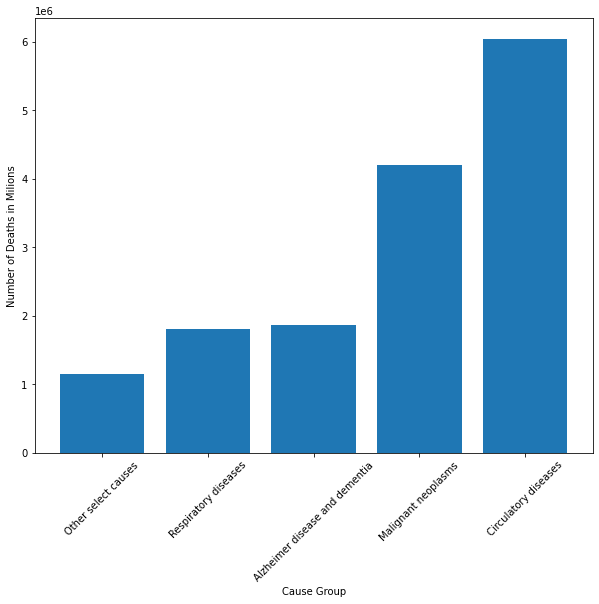

In [9]:
plt.figure(figsize=(10,8))

num_deaths_sorted = deaths_per_cause.sort_values(by="Number of Deaths")


plt.bar(range(len(num_deaths_sorted)), num_deaths_sorted["Number of Deaths"])

ax = plt.subplot()

ax.set_xticks(range(len(num_deaths_sorted["Cause Group"])))
ax.set_xticklabels(num_deaths_sorted["Cause Group"])

plt.xticks(rotation=45)

plt.ylabel("Number of Deaths in Milions")
plt.xlabel("Cause Group")

plt.savefig("deaths_per_cause_barchart.png")

plt.show()
plt.close()

In [10]:
num_deaths_by_state.to_csv("deaths_by_state.csv", index=False)

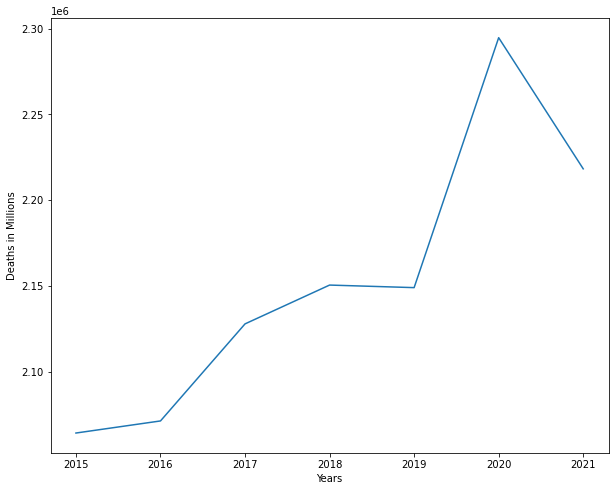

In [11]:
# Deaths by year


deaths_by_year_sorted = death_cause_unweighted[["Year", "Number of Deaths"]].groupby("Year").sum("Number of Deaths").sort_values(by="Year")





deaths_by_year_sorted.reset_index(inplace = True)


years = deaths_by_year_sorted["Year"]
deaths_every_year = deaths_by_year_sorted["Number of Deaths"]


plt.figure(figsize=(10,8))

plt.plot(range(len(deaths_every_year)), deaths_every_year)

ax = plt.subplot()

ax.set_xticks(range(len(years)))
ax.set_xticklabels(years)

plt.xlabel("Years")
plt.ylabel("Deaths in Millions")
plt.show()
plt.close()


6

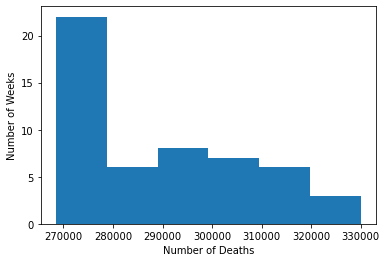

In [12]:
deaths_by_week =  death_cause_unweighted[["Week", "Number of Deaths"]].groupby("Week").sum("Number of Deaths")
deaths_by_week.reset_index(inplace = True)


num_deaths_week_no_min = deaths_by_week[deaths_by_week["Week"] != 53]
num_deaths_week_no_min

num_deaths_weeks = num_deaths_week_no_min["Number of Deaths"]


plt.hist(num_deaths_weeks, bins=6)

plt.ylabel("Number of Weeks")
plt.xlabel("Number of Deaths")

len(num_deaths_week_no_min[(num_deaths_week_no_min["Number of Deaths"] > 310000) & (num_deaths_week_no_min["Number of Deaths"] <  320000)])